# EDA

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_ROOT = "../data/"

## metadata

Sr. No.|Attribute|Description
-|-|-|
1|ID|This is a unique identifier of the accident record.
2|Source|Indicates source of the accident report (i.e. the API which reported the accident.).
3|TMC|A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
4|Severity|Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
5|Start_Time|Shows start time of the accident in local time zone.
6|End_Time|Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
7|Start_Lat|Shows latitude in GPS coordinate of the start point.
8|Start_Lng|Shows longitude in GPS coordinate of the start point.
9|End_Lat|Shows latitude in GPS coordinate of the end point.
10|End_Lng|Shows longitude in GPS coordinate of the end point.
11|Distance(mi)|The length of the road extent affected by the accident.
12|Description|Shows natural language description of the accident.
13|Number|Shows the street number in address field.
14|Street|Shows the street name in address field.
15|Side|Shows the relative side of the street (Right/Left) in address field.
16|City|Shows the city in address field.
17|County|Shows the county in address field.
18|State|Shows the state in address field.
19|Zipcode|Shows the zipcode in address field.
20|Country|Shows the country in address field.
21|Timezone|Shows timezone based on the location of the accident (eastern, central, etc.).
22|Airport_Code|Denotes an airport-based weather station which is the closest one to location of the accident.
23|Weather_Timestamp|Shows the time-stamp of weather observation record (in local time).
24|Temperature(F)|Shows the temperature (in Fahrenheit).
25|Wind_Chill(F)|Shows the wind chill (in Fahrenheit).
26|Humidity(%)|Shows the humidity (in percentage).
27|Pressure(in)|Shows the air pressure (in inches).
28|Visibility(mi)|Shows visibility (in miles).
29|Wind_Direction|Shows wind direction.
30|Wind_Speed(mph)|Shows wind speed (in miles per hour).
31|Precipitation(in)|Shows precipitation amount in inches, if there is any.
32|Weather_Condition|Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
33|Amenity|A POI annotation which indicates presence of amenity in a nearby location.
34|Bump|A POI annotation which indicates presence of speed bump or hump in a nearby location.
35|Crossing|A POI annotation which indicates presence of crossing in a nearby location.
36|Give_Way|A POI annotation which indicates presence of give_way in a nearby location.
37|Junction|A POI annotation which indicates presence of junction in a nearby location.
38|No_Exit|A POI annotation which indicates presence of no_exit in a nearby location.
39|Railway|A POI annotation which indicates presence of railway in a nearby location.
40|Roundabout|A POI annotation which indicates presence of roundabout in a nearby location.
41|Station|A POI annotation which indicates presence of station in a nearby location.
42|Stop|A POI annotation which indicates presence of stop in a nearby location.
43|Traffic_Calming|A POI annotation which indicates presence of traffic_calming in a nearby location.
44|Traffic_Signal|A POI annotation which indicates presence of traffic_signal in a nearby location.
45|Turning_Loop|A POI annotation which indicates presence of turning_loop in a nearby location.
46|Sunrise_Sunset|Shows the period of day (i.e. day or night) based on sunrise/sunset.
47|Civil_Twilight|Shows the period of day (i.e. day or night) based on civil twilight.
48|Nautical_Twilight|Shows the period of day (i.e. day or night) based on nautical twilight.
49|Astronomical_Twilight|Shows the period of day (i.e. day or night) based on astronomical twilight.

---

In [3]:
df = pd.read_csv(f"{DATA_ROOT}/raw/accidents.csv")

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Check Nans

## check which columns have nans

In [6]:
nan_cols_series = df.isna().any()
nan_cols_series

ID                       False
Source                   False
TMC                       True
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity 

In [7]:
nan_cols_series[nan_cols_series]

TMC                      True
End_Lat                  True
End_Lng                  True
Description              True
Number                   True
City                     True
Zipcode                  True
Timezone                 True
Airport_Code             True
Weather_Timestamp        True
Temperature(F)           True
Wind_Chill(F)            True
Humidity(%)              True
Pressure(in)             True
Visibility(mi)           True
Wind_Direction           True
Wind_Speed(mph)          True
Precipitation(in)        True
Weather_Condition        True
Sunrise_Sunset           True
Civil_Twilight           True
Nautical_Twilight        True
Astronomical_Twilight    True
dtype: bool

## Handling missing values

### Handling missing numerical values

1. Mean Imputation
2. Median Imputation
3. Mode Imputation
4. Remove NaNs
5. model based imputation

### Handling missing categorical values

1. Mode imputation
    1. replace with most occuring category
    2. `note` data set should not be highly skewed
    3. this type of strategy will make data highly imbalanced if nan count is very high
2. Median imputation
3. Threshold based imputation
    1. distribute categories based on distribution of categories across the data
    2. so that distribution of categories is not changed
    3. i.e weighted sampling from categories 
4. Model based imputation
    1. training a classifier by dropping rows of column which has missing values
        1. and predicting on the rows that are dropped

`NOTE` :

As this is a time bound task will take some tradeoffs with best possible method to handle nans

In [8]:
nan_cols = nan_cols_series[nan_cols_series].index.values.tolist()

In [9]:
# get nan percentage

percent_missing = df[nan_cols].isnull().sum() * 100 / len(df)

In [10]:
percent_missing.sort_values(ascending=False)

End_Lat                  70.548896
End_Lng                  70.548896
Number                   64.402694
Precipitation(in)        57.657793
Wind_Chill(F)            53.171675
TMC                      29.451104
Wind_Speed(mph)          12.938490
Weather_Condition         2.166941
Visibility(mi)            2.158915
Humidity(%)               1.983341
Temperature(F)            1.870779
Wind_Direction            1.675595
Pressure(in)              1.590441
Weather_Timestamp         1.233003
Airport_Code              0.192337
Timezone                  0.110428
Zipcode                   0.030424
Nautical_Twilight         0.003273
Sunrise_Sunset            0.003273
Civil_Twilight            0.003273
Astronomical_Twilight     0.003273
City                      0.003188
Description               0.000028
dtype: float64

## initial thoughts on missing data

1. ```plain_text
End_Lat                  70.548896
End_Lng                  70.548896
```
    - almost 70% of the data is missing
    - imputing/ handling this column will not add any value
    - skipping these columns from further analysis/ modelling
    
1. ```plain_text
Number                   64.402694
```
    - Number (i.e street number) alone does not convey any meaning
    - Occurence of street number with another descriptor variables like street name, city etc will add more value
    - skipping number from further analysis
    - filling with `-1` for identifying missing street number

1. ```plain_text
Precipitation(in)        57.657793
Wind_Chill(F)            53.171675
```
    - imputing weather data would include interfacing open source apis
    - this would be an extensive task
    - for each city/ state these variables would have different distribution
        - need to check distribution by grouping these variables
        - then impute

1. ```plain_text
TMC                      29.451104
```
    - we can treat nans as a different category here and make the analysis
    - fillna with `0.0` will work here as missing percentage is not very high

1. ```plain_text
Wind_Speed(mph)          12.938490
```
    - we can impute values here using methods mentioned in above section for numerical values
    - we need to check distribution of data here before we impute

1. ```plain_text
Weather_Condition         2.166941
Visibility(mi)            2.158915
Humidity(%)               1.983341
Temperature(F)            1.870779
Wind_Direction            1.675595
Pressure(in)              1.590441
Weather_Timestamp         1.233003
Airport_Code              0.192337
Timezone                  0.110428
Zipcode                   0.030424
Nautical_Twilight         0.003273
Sunrise_Sunset            0.003273
Civil_Twilight            0.003273
Astronomical_Twilight     0.003273
City                      0.003188
Description               0.000028
```
    - rest of the values are too small for given scale 
    - and can be easily imputed using simple methods like mean fill / median fill
    - this will vary from numerical and categorical variables accordingly

### `Number`, `TMC`

In [11]:
df["Number"] = df["Number"].fillna(-1)
df["TMC"] = df["TMC"].fillna(0.0)

1. As Number has significant % of nans in order to make data consistent adding `-1` as street number
1. As TMC has significant % of nans filling nans with a category `0.0`

### `Wind_Speed(mph)`

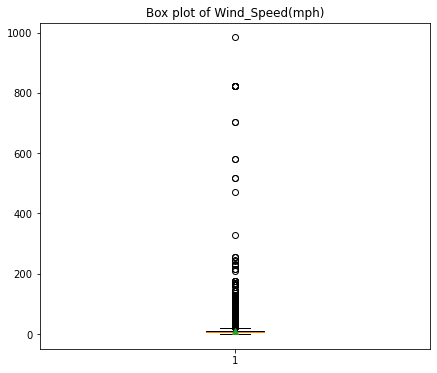

In [12]:
plt.figure(figsize=[7, 6])
plt.title("Box plot of Wind_Speed(mph)")
plt.boxplot(
    df["Wind_Speed(mph)"].dropna().values, showmeans=True,
)
plt.show()

1. Wind_Speed(mph) is skewed data, imputing with median
1. as Wind_Speed(mph) nan % is around 13% imputing with mode would have added to the skew

In [13]:
df["Wind_Speed(mph)"].median()

7.0

In [14]:
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].median())

### `Weather_Condition`

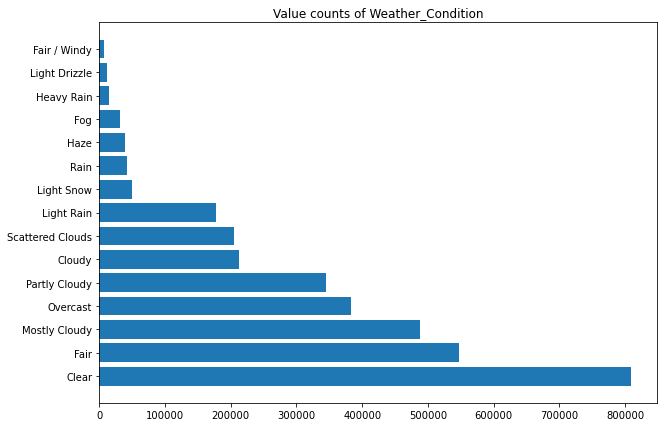

In [15]:
plt.figure(figsize=[10, 7])
plt.title("Value counts of Weather_Condition")
weather_cond_counts = (
    df["Weather_Condition"].value_counts().head(15).reset_index().values
)
plt.barh(
    weather_cond_counts[:, 0], weather_cond_counts[:, 1],
)
plt.show()

1. there is high skew in categorical data 
1. but Weather_Condition nans are around 2%
1. we can randomly sample from top 10-15 values and impute

In [16]:
weather_cond_counts[:10]

array([['Clear', 808202],
       ['Fair', 547721],
       ['Mostly Cloudy', 488094],
       ['Overcast', 382485],
       ['Partly Cloudy', 344815],
       ['Cloudy', 212878],
       ['Scattered Clouds', 204660],
       ['Light Rain', 176942],
       ['Light Snow', 50435],
       ['Rain', 42016]], dtype=object)

In [17]:
import random

list_of_candidates = weather_cond_counts[:10, 0]
number_of_items_to_pick = df["Weather_Condition"].isna().sum()
probability_distribution = (
    weather_cond_counts[:10, 1] / weather_cond_counts[:10, 1].sum()
)
draw = random.choices(
    list_of_candidates, k=number_of_items_to_pick, weights=probability_distribution
)

In [18]:
# fill nan values with random sample with weighted probabilities
df.loc[df["Weather_Condition"].isnull(), "Weather_Condition"] = draw

### `Visibility(mi)`, `Humidity(%)`, `Temperature(F)`, `Pressure(in)`

In [19]:
df["Visibility(mi)"].fillna(df["Visibility(mi)"].mean(), inplace=True)
df["Humidity(%)"].fillna(df["Humidity(%)"].mean(), inplace=True)
df["Temperature(F)"].fillna(df["Temperature(F)"].mean(), inplace=True)
df["Visibility(mi)"].fillna(df["Visibility(mi)"].mean(), inplace=True)
df["Pressure(in)"].fillna(df["Pressure(in)"].mean(), inplace=True)

1. each of above columns have very less nan % ≈ 1.5% imputing with mean

### ` Wind_Direction `

In [20]:
df["Wind_Direction"] = df["Wind_Direction"].fillna("none")

1. very less nan % ≈ around 1.5%
1. treating nan as `none` category

### `Weather_Timestamp`

In [21]:
# number of days' gap between Start_Time and Weather_Timestamp
(
    pd.to_datetime(df["Start_Time"]) - pd.to_datetime(df["Weather_Timestamp"])
).dt.days.describe().astype(int)

count    3470294
mean           0
std            0
min           -1
25%           -1
50%            0
75%            0
max            0
dtype: int64

In [22]:
# number of hours' gap between Start_Time and Weather_Timestamp
t = (
    pd.to_datetime(df["Start_Time"]) - pd.to_datetime(df["Weather_Timestamp"])
).dt.total_seconds()

In [23]:
(t / 60).describe()

count    3.470294e+06
mean    -5.289606e-01
std      3.434439e+01
min     -1.430283e+03
25%     -1.131667e+01
50%      6.666667e-02
75%      1.138333e+01
max      1.381000e+03
dtype: float64

1. making assumption that all variables will be available during inference time
1. Closest estimate of Weather_Timestamp would be Start_Time based on the data above
    1. as more than data 50% of data has 0 days difference
    1. more than 50% of data has Weather_Timestamp 6 hours(or less) earlier to Start_Time

In [24]:
df["Weather_Timestamp"] = df["Weather_Timestamp"].fillna(df["Start_Time"])

### `Others`

In [25]:
df["Airport_Code"] = df["Airport_Code"].fillna(df["Airport_Code"].mode().values[0])
df["Timezone"] = df["Timezone"].fillna(df["Timezone"].mode().values[0])
df["Nautical_Twilight"] = df["Nautical_Twilight"].fillna(
    df["Nautical_Twilight"].mode().values[0]
)
df["Sunrise_Sunset"] = df["Sunrise_Sunset"].fillna(
    df["Sunrise_Sunset"].mode().values[0]
)
df["Civil_Twilight"] = df["Civil_Twilight"].fillna(
    df["Civil_Twilight"].mode().values[0]
)
df["Astronomical_Twilight"] = df["Astronomical_Twilight"].fillna(
    df["Astronomical_Twilight"].mode().values[0]
)
df["City"] = df["City"].fillna(df["City"].mode().values[0])
df["Description"] = df["Description"].fillna("empty")

df["Zipcode"] = df["Zipcode"].fillna(df["Zipcode"].mode().values[0])

# Recheck missing values

In [28]:
recheck_nans_series = df.isna().any()
recheck_nans_series[recheck_nans_series]

End_Lat              True
End_Lng              True
Wind_Chill(F)        True
Precipitation(in)    True
dtype: bool

In [36]:
rm_cols = recheck_nans_series[recheck_nans_series].index.tolist()
rm_cols

['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']

+ ignoring the above columns as nan % is very high
+ time required to impute these values would be high

# Save cleaned data to csv

In [33]:
dir_path = f"{DATA_ROOT}/eda/"
os.makedirs(dir_path, exist_ok=True)

In [39]:
cols = df.columns.tolist()
for i in rm_cols:
    cols.remove(i)

In [41]:
file_path = f"{dir_path}/clean-data.csv"
df.to_csv(file_path, index=False, columns=cols)